In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import colourblind as cb

In [69]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

In [18]:
"""The alliance level dataset includes one entry per alliance and includes
 a wide range of information characteristic of the alliance as a whole".
 It does not contain variations in obligations of states within the alliance."""
atop_alliance = pd.read_csv("./ATOP_data/atop5_1a.csv")

In [19]:
# Convert COW country codes to country names
codes = pd.read_csv("../COW/COW_data/COW-country-codes.csv")
def cow_name(cow_code):
    return codes[codes["CCode"] == cow_code]["StateNme"].values[0]

In [20]:
""" Documentation on all columns:

Alliance Identification

atopid: UID
cowid: old cow alliance code
cow4id: cow alliance code

Formation and Duration

begyr:
begmo:
begday:
endyr:
endmo:
endday:



ineffect: as of December 31, 2018 (1 = in effect, 0 = not in effect)
bilat: 1 if bilateral, 0 if multilateral
maxphase: Number of phases
wartime: 1 if signed in wartime
estmode: 1 if treaty requires domestic ratification
pubsecr: 0 for public, 1 for secret articles, 2 for entirely concealed treaty
secrart: code to describe secret portion (0-8)
proadd: code to describe provisions for new members initialisation (0-3)
futmem: code for future members mentioned (0-3)
speclgth: code for specified length or conditions to treaty end (0-3)
length: number of months of initial treaty term
renounce: code for if there are provisions for members to renounce obligations (0-4)
proren: code for provisions on renewal (0-2)
renewlgt: number of months of renewal term
term: code for categorisation of how an alliance ended (0-3)

Obligations

defense: 1 if promise to provide active military support in the event of an attack on the sovereignty or territorial integrity of a member

offense: 1 if promise to provide active military support under any conditions, even if it does not maintain status quo

neutral: 1 if promises to not join or participate in conflict on the side of the adversary

nonagg: 1 if promises not to use force to settle disputes

consul: 1 if promises to consult alliance in the event of a crisis which could become a conflict

active: 1 if promises military support

conditio: 1 if obligations are conditional upon particular circumstances

defcon: 1 if defence obligation is conditional
offcon: 1 if offence obligation is conditional
neucon: 1 if neutral obligation is conditional
concon: 1 if consul obligation is conditional
asymm: 1 if obligations are asymmetrical between members
notaiden: code for promises to not aid adversaries (0-4)
dipaid: 1 if promises to provide diplomatic support
terrres: 1 if promises access of territory or resources in the event of conflict
seppeace: code for promises not to conclude a separate peace (0-3)
thirdcom: 1 if promises to consult with alliance before making commitments to third parties
noothall: 1 if promises not to enter into opposing alliances
specthrt: code for if a specific threat is mentioned in the treaty (0-6)
statthr1: COW code of state mentioned as a threat
statthr2: COW code of state 2 mentioned as a threat

Institutionalisation

conwtin: code for treaty mentioning conflict amongst members (0-3)
medarb: 1 if promises to mediate or arbitrate disputes amongst members
milcon: code for coordination between military forces (0-3)
milaid: code for military aid (0-4)
intcom: 1 for integrated command amongst allies in peace and wartime
subord: code for military to be subordinate to another member during conflict (0-2)
organ1: code for creation of alliance organisation (0-3)
orgpurp1: code for purpose of organisation 1 (0-5)
organ2: code for creation of alliance organisation 2 (0-3)
orgpurp2: code for purpose of organisation 2 (0-5)
base: code for joint troop placements (0-3)
contrib: 1 if military contributions or how incurred costs are divided
armred: code for limits on arms (1) or increasing arms (2)
acqterr: code for if acquiring new territory is permissible (1) or not (2)
divgains: 1 if agreement on how spoils of conflict are divided between members
demwith: 1 if treaty mentions demobilisation or withdrawal after conflict

Other Content

reflnun: code for references to League of Nations (1) or United Nations (2)
refothio: 1 if reference to any other international organisation
natrefal: code for mentioning of other alliances in treaty (0-3)
compag: code for mentioning of companion agreements (0-6)
nomicoop: 1 if cooperation on non-military issues included
conres: code for if a solution to an existing conflict among allies (1) or third parties (2) is mentioned
agprois: code for commitments to negotiate additional agreements on particular issues in the future (0-5)
conmen: 1 if treaty mentions unresolved internal conflicts that are deferred for later resolution
ecaid: code for economic aid obligations (0-3)
interv: code for intervention in another member's domestic affairs (0-4)

Documentation

source: code for primary source (1) or secondary source (2) used in this dataset
new5: 1 if not included in version 4
rev5: 1 if changed between version 4 and 5
version: version number of this dataset

members: usually 60 columns of members, I condensed into a list
"""
print()

In [21]:
atop_alliance.info()
atop_alliance.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Columns: 134 entries, atopid to version
dtypes: float64(107), int64(27)
memory usage: 826.1 KB


,atopid,cowid,cow4id,begyr,begmo,begday,endyr,endmo,endday,ineffect,...,mem54,mem55,mem56,mem57,mem58,mem59,source,new5,rev5,version
0,1005,NaN,NaN,1815,1,3.0,1815,2,8.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,5.1
1,1010,NaN,NaN,1815,1,14.0,1815,6,8.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,5.1
2,1015,NaN,NaN,1815,4,29.0,1815,6,12.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,5.1
3,1020,2005.0,3.0,1815,6,8.0,1866,6,15.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,5.1
4,1025,2006.0,4.0,1815,6,12.0,1820,7,13.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,5.1


In [22]:
atop_alliance.isnull().sum()

atopid       0
cowid      479
cow4id     395
begyr        0
begmo        0
          ... 
mem59      788
source       0
new5         0
rev5         0
version      0
Length: 134, dtype: int64

In [23]:
""" Missing data """
#atop_alliance[atop_alliance['begday'].isnull()]
#for i, j in atop_alliance[atop_alliance['endday'].isnull()].iterrows():
#    print("\n",j["atopid"]," ",j["begyr"],"-",j["endyr"])
#    print([cow_name(k) for k in j["members"]])
#atop_alliance[atop_alliance['endday'].isnull()]
#1035, 1040, 1120  idk

# one entry missing data for begday -> 1844 secret anglo-russian treaty so thats no surprise\cite{Cox1970}

""""
end day missing for 1125 \& 1130, modenna \& parma were annexed from austria by sardinia in 1860 so likely that.

1220 is the ecuadorian peru treaty signed after their war in 1860. Treaty of Mapasingue
The Treaty of Mapasingue was nullified by the Ecuadorian Congress in 1861

2075
https://www.mfa.gov.tr/turkiye_afghanistan-bilateral-political-relations.en.mfa doesnt say when it ended

Treaty of Berlin (1926), 5 years from 1926 to 1931 and ratafied again may 5th 1931.  2150

Soviet–Lithuanian Non-Aggression Pact. ended In September and October 1939 the Soviet government compelled the much smaller Baltic states to conclude mutual assistance pacts which gave the Soviets the right to establish military bases there 2185

3045 Czechoslovakia / Yugoslavia – May 9, 1946 (KCA)
A Czechoslovak-Yugoslav treaty of mutual assistance, cooperation and friendship is signed. http://www.coldwar.hu/chronologies/1945-1991/Chronology_1946.html

Albania / Yugoslavia – July 9, 1946 (PLC)
A Yugoslav-Albanian friendship and mutual assistance agreement is signed in Tirana source as above

Hungary / Yugoslavia – December 6, 1947 (HC)
Led by Tito, a Yugoslavian Government delegation travels to Budapest. They sign an agreement about mutual aid and support 3090

USSR also issued a memorandum recognizing Malta’s neutrality in 1981- malta is still neutral so idk
"""

'"\nend day missing for 1125 \\& 1130, modenna \\& parma were annexed from austria by sardinia in 1860 so likely that.\n\n1220 is the ecuadorian peru treaty signed after their war in 1860. Treaty of Mapasingue\nThe Treaty of Mapasingue was nullified by the Ecuadorian Congress in 1861\n\n2075\nhttps://www.mfa.gov.tr/turkiye_afghanistan-bilateral-political-relations.en.mfa doesnt say when it ended\n\nTreaty of Berlin (1926), 5 years from 1926 to 1931 and ratafied again may 5th 1931.  2150\n\nSoviet–Lithuanian Non-Aggression Pact. ended In September and October 1939 the Soviet government compelled the much smaller Baltic states to conclude mutual assistance pacts which gave the Soviets the right to establish military bases there 2185\n\n3045 Czechoslovakia / Yugoslavia – May 9, 1946 (KCA)\nA Czechoslovak-Yugoslav treaty of mutual assistance, cooperation and friendship is signed. http://www.coldwar.hu/chronologies/1945-1991/Chronology_1946.html\n\nAlbania / Yugoslavia – July 9, 1946 (PLC)\

In [24]:
""" Finding key alliances """
# Nato is correct
#sorted([cow_name(i) for i in atop_alliance[atop_alliance["atopid"] == 3180]["members"].iloc[0]])
#atop_alliance[atop_alliance["atopid"] == 3075]
#sorted([cow_name(i) for i in atop_alliance[atop_alliance["cow4id"] == 227]["members"].iloc[0]])
#atop_alliance[atop_alliance["cow4id"] == 227]

' Finding key alliances '

In [25]:
"""Number of multilateral alliances"""
print(f"There are {atop_alliance['bilat'].value_counts()[0]} multilateral alliances")

There are 111 multilateral alliances


In [26]:
# Combining member columns into a single column as a list of members

# Gets all column member names
member_columns = [f"mem{i}" for i in range(1, 60)]

# Creates a new column with a list of members with no NaN values
atop_alliance["members"] = atop_alliance[member_columns].apply(lambda x: x.dropna().tolist(), axis=1)

# Drops all old member columns
atop_alliance.drop(member_columns, axis=1, inplace=True)
atop_alliance.head()

,atopid,cowid,cow4id,begyr,begmo,begday,endyr,endmo,endday,ineffect,...,conres,agprois,conmen,ecaid,interv,source,new5,rev5,version,members
0,1005,NaN,NaN,1815,1,3.0,1815,2,8.0,0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,5.1,"[200.0, 210.0, 220.0, 240.0, 245.0, 300.0]"
1,1010,NaN,NaN,1815,1,14.0,1815,6,8.0,0,...,0.0,0.0,0.0,1.0,0.0,1,0,0,5.1,"[275.0, 300.0]"
2,1015,NaN,NaN,1815,4,29.0,1815,6,12.0,0,...,2.0,3.0,0.0,0.0,0.0,1,0,0,5.1,"[300.0, 329.0]"
3,1020,2005.0,3.0,1815,6,8.0,1866,6,15.0,0,...,0.0,0.0,0.0,0.0,2.0,1,0,0,5.1,"[240.0, 245.0, 255.0, 267.0, 269.0, 271.0, 273..."
4,1025,2006.0,4.0,1815,6,12.0,1820,7,13.0,0,...,0.0,3.0,0.0,0.0,0.0,1,0,0,5.1,"[300.0, 329.0]"


In [27]:
atop_alliance.tail()

,atopid,cowid,cow4id,begyr,begmo,begday,endyr,endmo,endday,ineffect,...,conres,agprois,conmen,ecaid,interv,source,new5,rev5,version,members
784,7030,NaN,NaN,2017,10,2.0,0,0,0.0,1,...,0.0,0.0,0.0,0.0,1.0,1,1,0,5.1,"[365.0, 701.0]"
785,7040,NaN,NaN,2018,6,17.0,0,0,0.0,1,...,1.0,0.0,0.0,0.0,0.0,1,1,0,5.1,"[343.0, 350.0]"
786,7043,NaN,NaN,2018,8,17.0,0,0,0.0,1,...,0.0,0.0,0.0,0.0,1.0,1,0,0,5.1,"[702.0, 704.0]"
787,7045,NaN,NaN,2018,9,25.0,0,0,0.0,1,...,0.0,0.0,0.0,0.0,1.0,1,1,0,5.1,"[80.0, 365.0]"
788,7050,NaN,NaN,2018,9,28.0,0,0,0.0,1,...,0.0,0.0,0.0,0.0,1.0,1,1,0,5.1,"[54.0, 365.0]"


In [28]:
""" Finding occurance of 8152 country """
for i in range(len(atop_alliance["members"])):
    if 8152 in atop_alliance["members"].loc[i]:
        print(i)
atop_alliance[atop_alliance.index == 66]

66


,atopid,cowid,cow4id,begyr,begmo,begday,endyr,endmo,endday,ineffect,...,conres,agprois,conmen,ecaid,interv,source,new5,rev5,version,members
66,1320,NaN,NaN,1874,3,15.0,1883,8,25.0,0,...,1.0,5.0,0.0,3.0,0.0,1,0,0,5.1,"[220.0, 8152.0]"


In [29]:
atop_alliance[atop_alliance["begyr"] == 1874]

,atopid,cowid,cow4id,begyr,begmo,begday,endyr,endmo,endday,ineffect,...,conres,agprois,conmen,ecaid,interv,source,new5,rev5,version,members
66,1320,NaN,NaN,1874,3,15.0,1883,8,25.0,0,...,1.0,5.0,0.0,3.0,0.0,1,0,0,5.1,"[220.0, 8152.0]"


In [30]:
atop_alliance[atop_alliance["begyr"] == 1815]

,atopid,cowid,cow4id,begyr,begmo,begday,endyr,endmo,endday,ineffect,...,conres,agprois,conmen,ecaid,interv,source,new5,rev5,version,members
0,1005,NaN,NaN,1815,1,3.0,1815,2,8.0,0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,5.1,"[200.0, 210.0, 220.0, 240.0, 245.0, 300.0]"
1,1010,NaN,NaN,1815,1,14.0,1815,6,8.0,0,...,0.0,0.0,0.0,1.0,0.0,1,0,0,5.1,"[275.0, 300.0]"
2,1015,NaN,NaN,1815,4,29.0,1815,6,12.0,0,...,2.0,3.0,0.0,0.0,0.0,1,0,0,5.1,"[300.0, 329.0]"
3,1020,2005.0,3.0,1815,6,8.0,1866,6,15.0,0,...,0.0,0.0,0.0,0.0,2.0,1,0,0,5.1,"[240.0, 245.0, 255.0, 267.0, 269.0, 271.0, 273..."
4,1025,2006.0,4.0,1815,6,12.0,1820,7,13.0,0,...,0.0,3.0,0.0,0.0,0.0,1,0,0,5.1,"[300.0, 329.0]"
5,1030,2007.0,5.0,1815,6,12.0,1848,3,29.0,0,...,0.0,3.0,0.0,0.0,0.0,1,0,0,5.1,"[300.0, 337.0]"
6,1035,2008.0,6.0,1815,11,20.0,1822,12,NaN,0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,5.1,"[200.0, 255.0, 300.0, 365.0]"


In [31]:
atop_alliance[atop_alliance["cow4id"] == 1]

,atopid,cowid,cow4id,begyr,begmo,begday,endyr,endmo,endday,ineffect,...,conres,agprois,conmen,ecaid,interv,source,new5,rev5,version,members


In [32]:
# Searching for known alliances that were incorrect in COW

# NATO version4id: 227, Missing North Macedonia 2020
nato = atop_alliance[atop_alliance["cow4id"] == 227]
nato_members = nato["members"].values[0]
nato_members_names = [cow_name(cow) for cow in nato_members]

# SEATO version4id: 228, correct
seato = atop_alliance[atop_alliance["cow4id"] == 238]
seato_members = seato["members"].values[0]
seato_members_names = [cow_name(cow) for cow in seato_members]

# Warsaw Pact version4id: 229, correct but Soviet Union is Russia
warsaw_pact = atop_alliance[atop_alliance["cow4id"] == 243]
warsaw_pact_members = warsaw_pact["members"].values[0]
warsaw_pact_members_names = [cow_name(cow) for cow in warsaw_pact_members]

# CSTO version4id: 230, correct
csto = atop_alliance[atop_alliance["cow4id"] == 350]
csto_members = csto["members"].values[0]
csto_members_names = [cow_name(cow) for cow in csto_members]

# Rio Pact version4id: 210, correct
rio_pact = atop_alliance[atop_alliance["cow4id"] == 210]
rio_pact_members = rio_pact["members"].values[0]
rio_pact_members_names = [cow_name(cow) for cow in rio_pact_members]


In [33]:
atop_alliance[atop_alliance["begyr"]==2022]

,atopid,cowid,cow4id,begyr,begmo,begday,endyr,endmo,endday,ineffect,...,conres,agprois,conmen,ecaid,interv,source,new5,rev5,version,members


In [34]:
""" Asymmetric alliances not including consul """
nonconsul = atop_alliance[atop_alliance["consul"]==0]
asym_alliances = nonconsul[nonconsul["asymm"]==1]
number_asym = len(asym_alliances)

asym_countries = {}
for row in asym_alliances.iterrows():
    for country in row[1]["members"]:
        if country in asym_countries:
            asym_countries[country] += 1
        else:
            asym_countries[country] = 1

asym_max_key = max(asym_countries, key=asym_countries.get)
asym_max_value = asym_countries[asym_max_key]

print(f"There are {number_asym} asymmetrical alliances\nThere are {len(asym_countries)} states\nThe country with the most asymmetrical alliances is {cow_name(asym_max_key)} with {asym_max_value} alliances")

There are 48 asymmetrical alliances
There are 55 states
The country with the most asymmetrical alliances is United Kingdom with 16 alliances


In [35]:
asym_alliances = atop_alliance[atop_alliance["asymm"]==1]
asym_alliances = asym_alliances[(asym_alliances["defense"]==1) | (asym_alliances["offense"]==1)]
number_asym = len(asym_alliances)

asym_countries = {}
for row in asym_alliances.iterrows():
    for country in row[1]["members"]:
        if country in asym_countries:
            asym_countries[country] += 1
        else:
            asym_countries[country] = 1

asym_max_key = max(asym_countries, key=asym_countries.get)
asym_max_value = asym_countries[asym_max_key]

print(f"There are {number_asym} asymmetrical alliances\nThere are {len(asym_countries)} states\nThe country with the most asymmetrical alliances is {cow_name(asym_max_key)} with {asym_max_value} alliances")

There are 78 asymmetrical alliances
There are 66 states
The country with the most asymmetrical alliances is United Kingdom with 29 alliances


In [36]:
""" Case Study of UK asymmetrical alliances """
uk_asym = asym_alliances[asym_alliances["members"].apply(lambda x: 200 in x)]
uk_asym['wartime'].sum() # 10/30 are during wartime as compared to
asym_alliances['wartime'].sum() # 22/91 are during wartime
uk_asym['defense'].sum() # 26/30 have defense obligations
uk_asym

,atopid,cowid,cow4id,begyr,begmo,begday,endyr,endmo,endday,ineffect,...,conres,agprois,conmen,ecaid,interv,source,new5,rev5,version,members
20,1100,2022.0,19.0,1834,4,22.0,1839,8,31.0,0,...,0.0,0.0,0.0,0.0,3.0,1,0,0,5.1,"[200.0, 220.0, 230.0, 235.0]"
21,1110,2023.0,20.0,1840,7,15.0,1840,11,27.0,0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,5.1,"[200.0, 255.0, 300.0, 365.0, 640.0]"
23,1118,NaN,NaN,1846,4,4.0,1856,10,8.0,0,...,1.0,0.0,0.0,0.0,0.0,1,0,0,5.1,"[200.0, 710.0]"
24,1120,2025.0,22.0,1847,5,21.0,1847,8,NaN,0,...,2.0,0.0,0.0,0.0,0.0,1,0,0,5.1,"[200.0, 220.0, 230.0, 235.0]"
32,1160,2031.0,28.0,1854,3,12.0,1856,3,30.0,0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,5.1,"[200.0, 220.0, 325.0, 640.0]"
38,1190,2037.0,34.0,1855,11,21.0,1856,3,30.0,0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,5.1,"[200.0, 220.0, 380.0]"
61,1295,2059.0,57.0,1870,8,9.0,1872,5,10.0,0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,5.1,"[200.0, 255.0]"
62,1300,2060.0,58.0,1870,8,11.0,1872,5,10.0,0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,5.1,"[200.0, 220.0]"
69,1330,2064.0,63.0,1878,6,4.0,1880,11,25.0,0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,5.1,"[200.0, 640.0]"
85,1400,NaN,NaN,1899,10,14.0,1949,4,4.0,0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,5.1,"[200.0, 235.0]"


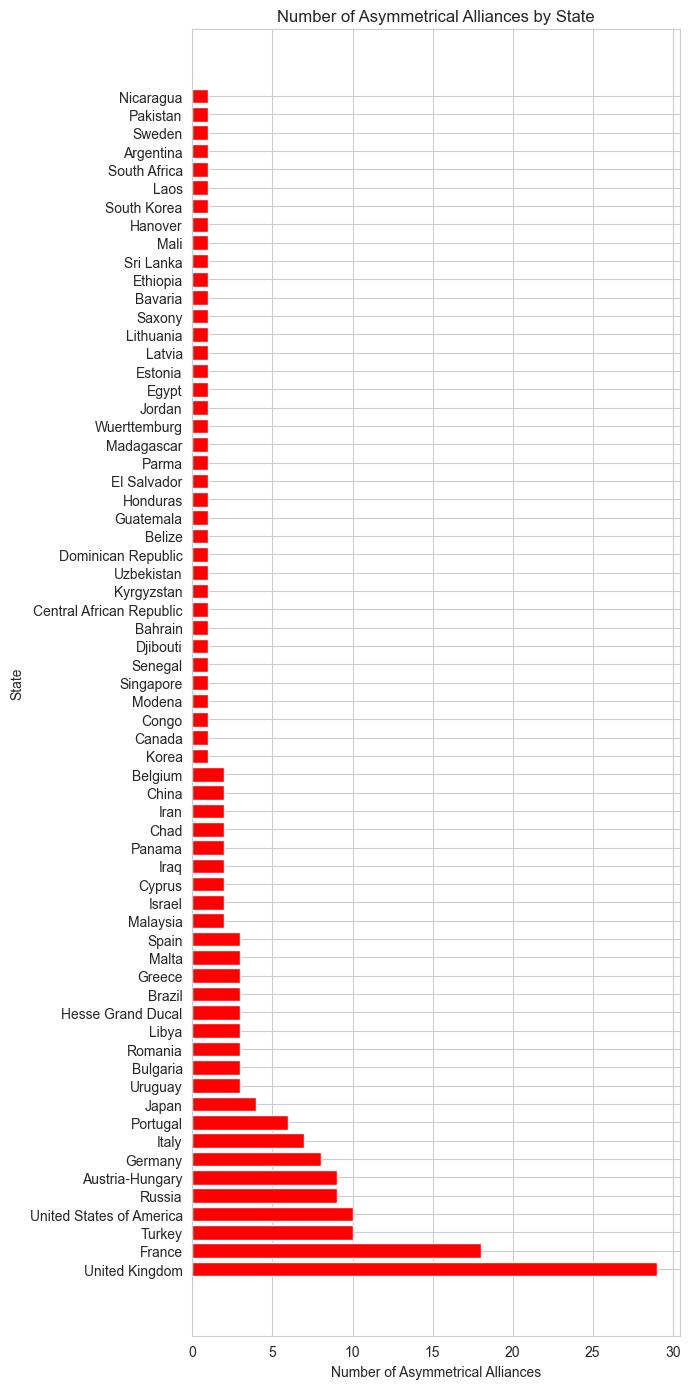

In [37]:
"""Plotting the number of asymmetrical alliances by state"""
# Convert COW country codes to country names
# Need to come back and figure out what country 8152 is
asym_countries_names = {}
for country, value in asym_countries.items():
    if country == 8152:
        continue
    asym_countries_names[cow_name(country)] = value

# Create dataframe for plot
asymmetric_df = pd.DataFrame({'state_name':asym_countries_names.keys(),'alliances':asym_countries_names.values()})
asymmetric_df = asymmetric_df.sort_values(by='alliances', ascending=False)

# Horizontal bar plot
plt.figure(figsize=(7, 14))
plt.barh(asymmetric_df['state_name'], asymmetric_df['alliances'], color='red')
plt.ylabel('State')
plt.xlabel('Number of Asymmetrical Alliances')
plt.title('Number of Asymmetrical Alliances by State')
plt.tight_layout()
plt.show()

In [77]:
""" Plotting the number of asymmetric alliances by state as a chloropleth map """
fig = px.choropleth(asymmetric_df, locations='state_name', locationmode='country names', color='alliances', color_continuous_scale=px.colors.sequential.Viridis, hover_name='state_name',labels={'alliances':'Alliances'},width=1000, height=700)
# Viridis is colour blind safe
fig.update_geos(projection_type="natural earth")
#fig.update_layout(title_text='Number of Asymmetrical Alliances by State')
fig.write_image("./ATOP_data/asymmetrical_alliances_ATOP.png")
fig.show()

C:\Users\AKaiz\AppData\Local\Temp\ipykernel_14328\3006366712.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\AKaiz\AppData\Local\Temp\ipykernel_14328\3006366712.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



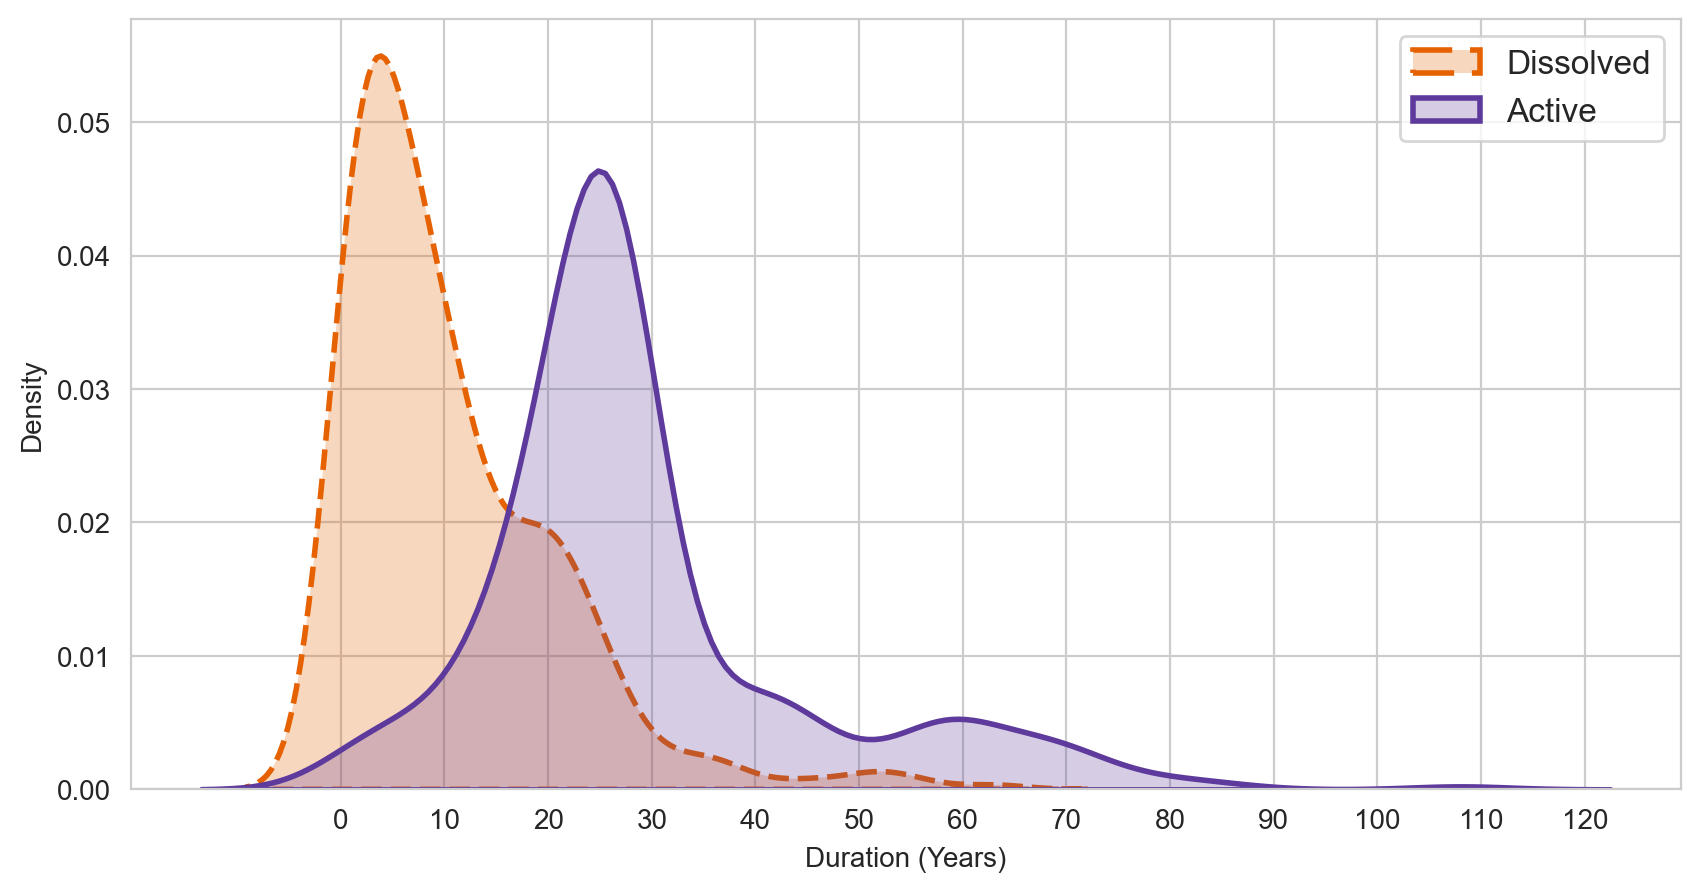

count    372.000000
mean      29.077957
std       15.749791
min        1.000000
25%       22.000000
50%       26.000000
75%       28.000000
max      108.000000
Name: duration, dtype: float64

In [71]:
""" Alliance Durations """
durations = atop_alliance[atop_alliance["endyr"] != 0]
durations["duration"] = durations["endyr"] - durations["begyr"]
durations_ongoing = atop_alliance[atop_alliance["endyr"] == 0]
durations_ongoing["duration"] = 2019 - durations_ongoing["begyr"]
durations_ongoing["duration"]

# Plotting seceded alliance durations
plt.figure(figsize=(10, 5))
sns.kdeplot(durations['duration'], fill=True, color=cb.quantitative['orgmag'][0], linewidth=2, linestyle='--')
sns.kdeplot(durations_ongoing['duration'], fill=True, color=cb.quantitative['orgmag'][1], linewidth=2)
plt.xticks(range(0, 121, 10))
plt.xlabel('Duration (Years)')
plt.ylabel('Density')
#plt.title('Density Plots of Dissolved and Active Alliance Durations')
plt.legend(['Dissolved', 'Active'], fontsize='large')
plt.show()

durations_ongoing["duration"].describe()

#print(f"There are {len(durations)} ended alliances and {len(durations_ongoing)} ongoing alliances\nrepresenting {len(durations)/len(atop_alliance)*100:.2f}% and {len(durations_ongoing)/len(atop_alliance)*100:.2f}% of all alliances, respectively")

In [40]:
""" Alliances Formation and Dissolution by year """
formation = atop_alliance["begyr"].value_counts().sort_index()
formation_mil = atop_alliance[atop_alliance["active"] == 1]["begyr"].value_counts().sort_index()
formation_neutral = atop_alliance[atop_alliance["neutral"] == 1]["begyr"].value_counts().sort_index()
formation_nonagg = atop_alliance[atop_alliance["nonagg"] == 1]["begyr"].value_counts().sort_index()
formation_consul = atop_alliance[atop_alliance["consul"] == 1]["begyr"].value_counts().sort_index()

dissolution = atop_alliance[atop_alliance["endyr"] != 0]["endyr"].value_counts().sort_index()
dissolution_mil = atop_alliance[(atop_alliance["endyr"] != 0) & (atop_alliance["active"] == 1)]["endyr"].value_counts().sort_index()
dissolution_neutral = atop_alliance[(atop_alliance["endyr"] != 0) & (atop_alliance["neutral"] == 1)]["endyr"].value_counts().sort_index()
dissolution_nonagg = atop_alliance[(atop_alliance["endyr"] != 0) & (atop_alliance["nonagg"] == 1)]["endyr"].value_counts().sort_index()
dissolution_consul = atop_alliance[(atop_alliance["endyr"] != 0) & (atop_alliance["consul"] == 1)]["endyr"].value_counts().sort_index()

print(f"Formation: {formation.sum()}\nMilitary: {formation_mil.sum()}, {formation_mil.sum()/formation.sum()}%\nNeutral: {formation_neutral.sum()}, {formation_neutral.sum()/formation.sum()}%\nNonaggression: {formation_nonagg.sum()}, {formation_nonagg.sum()/formation.sum()}%\nConsultation: {formation_consul.sum()}, {formation_consul.sum()/formation.sum()}%\n\nDissolution: {dissolution.sum()}\nMilitary: {dissolution_mil.sum()}, {dissolution_mil.sum()/dissolution.sum()}%\nNeutral: {dissolution_neutral.sum()}, {dissolution_neutral.sum()/dissolution.sum()}%\nNonaggression: {dissolution_nonagg.sum()}, {dissolution_nonagg.sum()/dissolution.sum()}%\nConsultation: {dissolution_consul.sum()}, {dissolution_consul.sum()/dissolution.sum()}%")

Formation: 789
Military: 294, 0.3726235741444867%
Neutral: 126, 0.1596958174904943%
Nonaggression: 442, 0.5602027883396705%
Consultation: 388, 0.4917617237008872%

Dissolution: 417
Military: 246, 0.5899280575539568%
Neutral: 71, 0.17026378896882494%
Nonaggression: 139, 0.3333333333333333%
Consultation: 193, 0.4628297362110312%


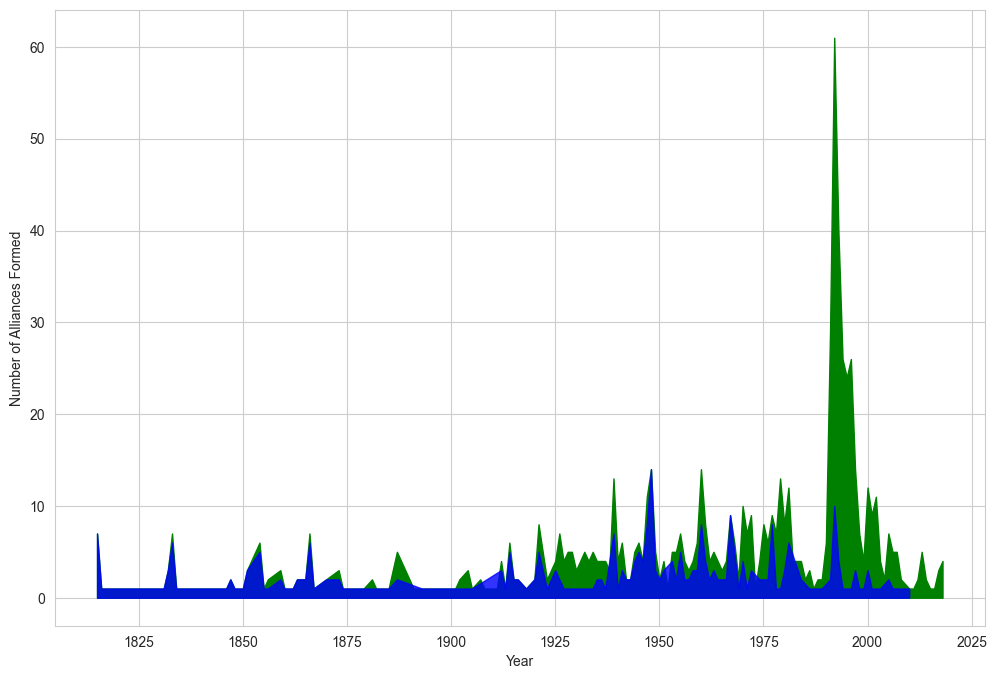

In [41]:
""" Plotting Alliance Formation """
plt.figure(figsize=(12, 8))
plt.fill_between(formation.index, formation.values, color='green')
plt.fill_between(formation_mil.index, formation_mil.values, color='blue', alpha = 0.8)
plt.xlabel('Year')
plt.ylabel('Number of Alliances Formed')
#plt.title('Alliances Formed by Year')
plt.show()

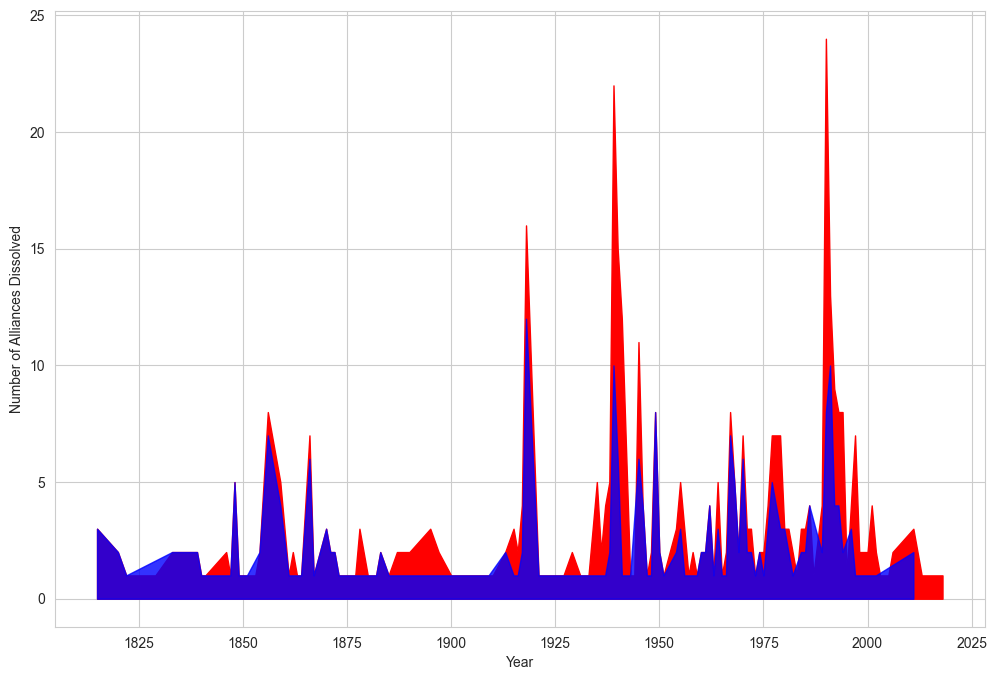

In [42]:
""" Plotting Alliance Dissolution """
plt.figure(figsize=(12, 8))
plt.fill_between(dissolution.index, dissolution.values, color='red')
plt.fill_between(dissolution_mil.index, dissolution_mil.values, color='blue', alpha = 0.8)
plt.xlabel('Year')
plt.ylabel('Number of Alliances Dissolved')
#plt.title('Alliances Dissolved by Year')
plt.show()

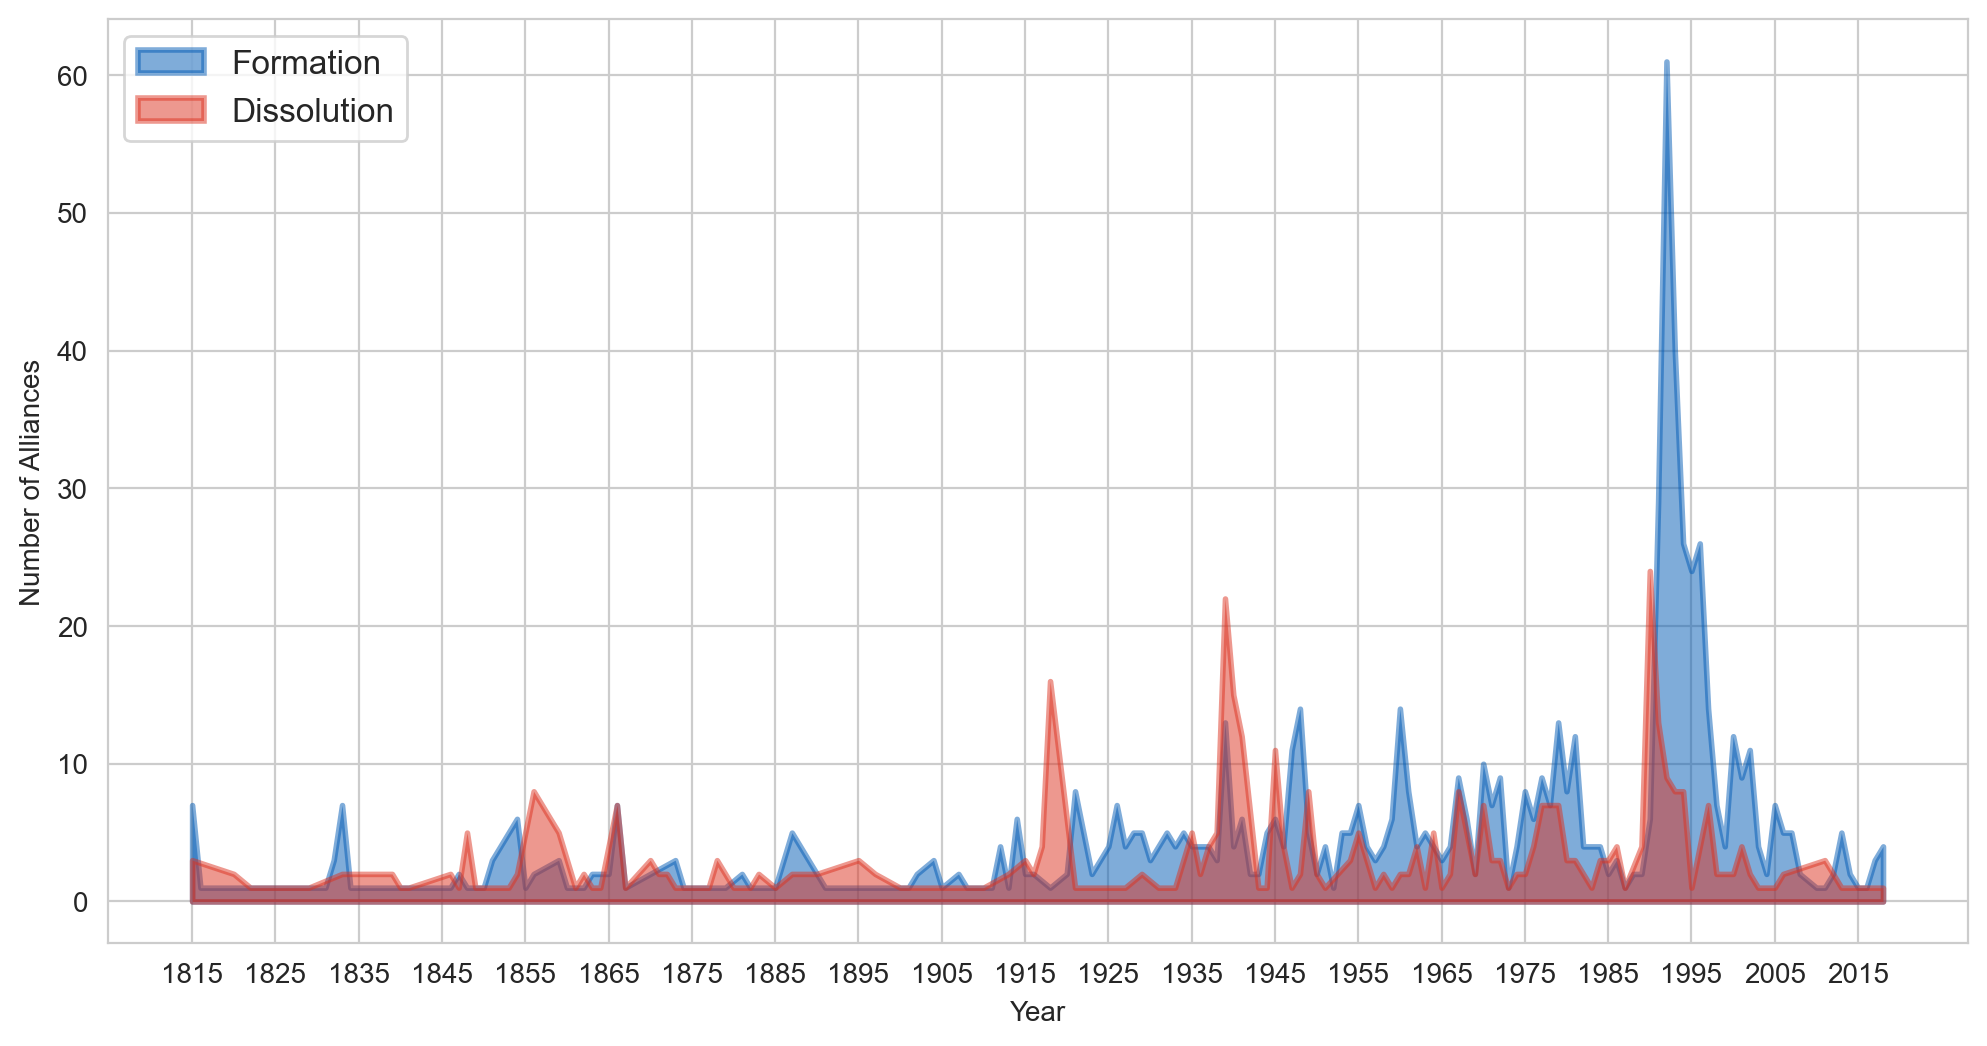

In [76]:
""" Plotting Alliance Formation and Dissolution """
plt.figure(figsize=(12, 6))
plt.fill_between(formation.index, formation.values, color=cb.quantitative['blured'][0], alpha=0.5, linewidth=2)
plt.fill_between(dissolution.index, dissolution.values, color=cb.quantitative['blured'][1], alpha=0.5, linewidth=2)
plt.xticks(range(1815, 2020, 10))
plt.xlabel('Year')
plt.ylabel('Number of Alliances')
#plt.title('Alliances Formation and Dissolution by Year')
plt.legend(['Formation', 'Dissolution'], loc='upper left', fontsize='large')
plt.show()

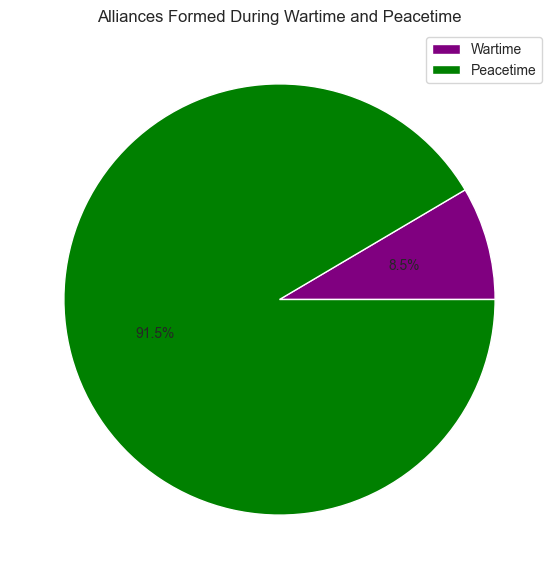

In [44]:
""" Plotting Alliances During Wartime """
wartime = len(atop_alliance[atop_alliance["wartime"] == 1])
# Pie chart
labels = ['Wartime', 'Peacetime']
sizes = [wartime, len(atop_alliance) - wartime]
colors = ['purple', 'green']
plt.figure(figsize=(7, 7))
plt.pie(sizes, colors=colors, autopct='%1.1f%%')
plt.title('Alliances Formed During Wartime and Peacetime')
plt.legend(labels)
plt.show()


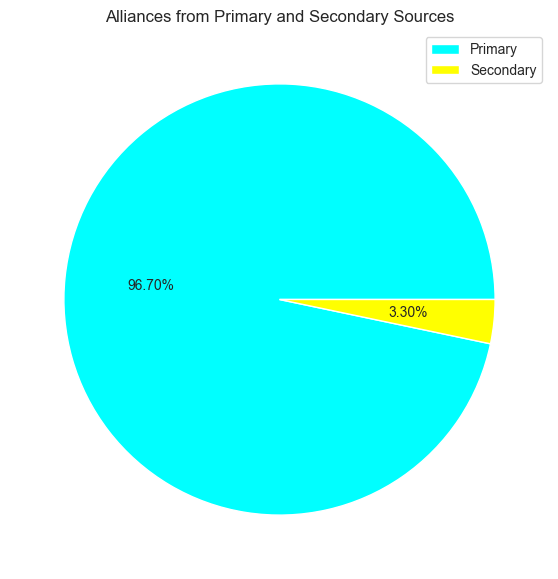

In [45]:
""" Plotting Alliances According to Source """
source = len(atop_alliance[atop_alliance["source"] == 1])
# Pie chart
labels = ['Primary', 'Secondary']
sizes = [source, len(atop_alliance) - source]
colors = ['cyan', 'yellow']
plt.figure(figsize=(7, 7))
plt.pie(sizes, colors=colors, autopct='%1.2f%%')
plt.title('Alliances from Primary and Secondary Sources')
plt.legend(labels)
plt.show()

In [46]:
""" Additional information """
atop_alliance["intcom"].value_counts()
atop_alliance["milcon"].value_counts()

milcon
0.0    640
2.0    100
1.0     28
3.0     12
Name: count, dtype: int64

In [47]:
""" Size of Alliances """
alliance_size = atop_alliance["members"].apply(len).value_counts().sort_index(ascending=False)

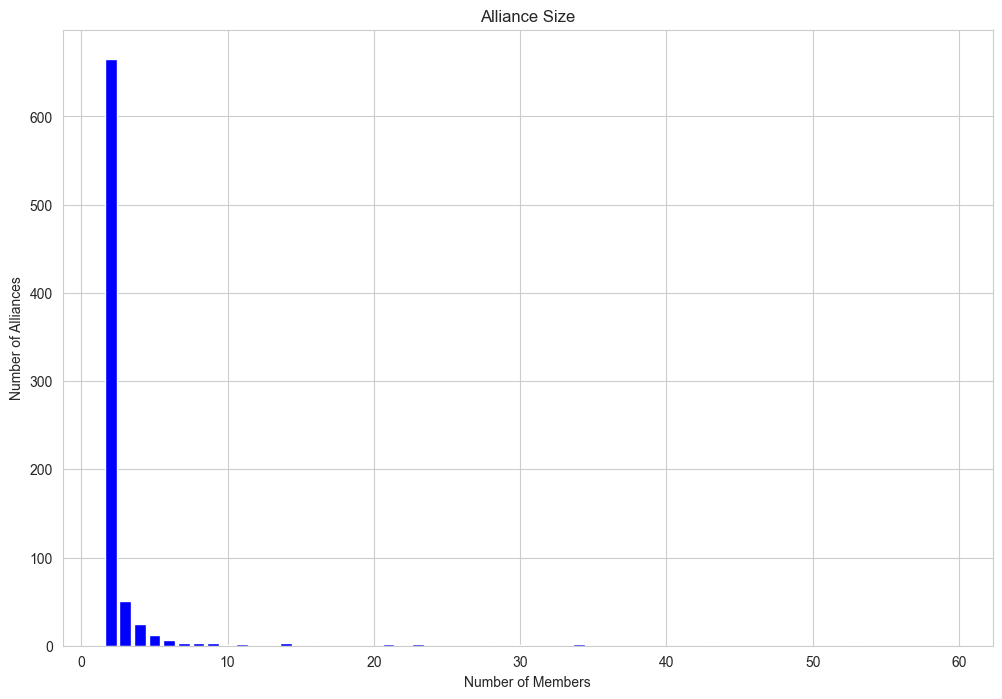

In [48]:
""" Plotting alliance size """
plt.figure(figsize=(12, 8))
plt.bar(alliance_size.index, alliance_size.values, color='blue')
plt.xlabel('Number of Members')
plt.ylabel('Number of Alliances')
plt.title('Alliance Size')
plt.show()


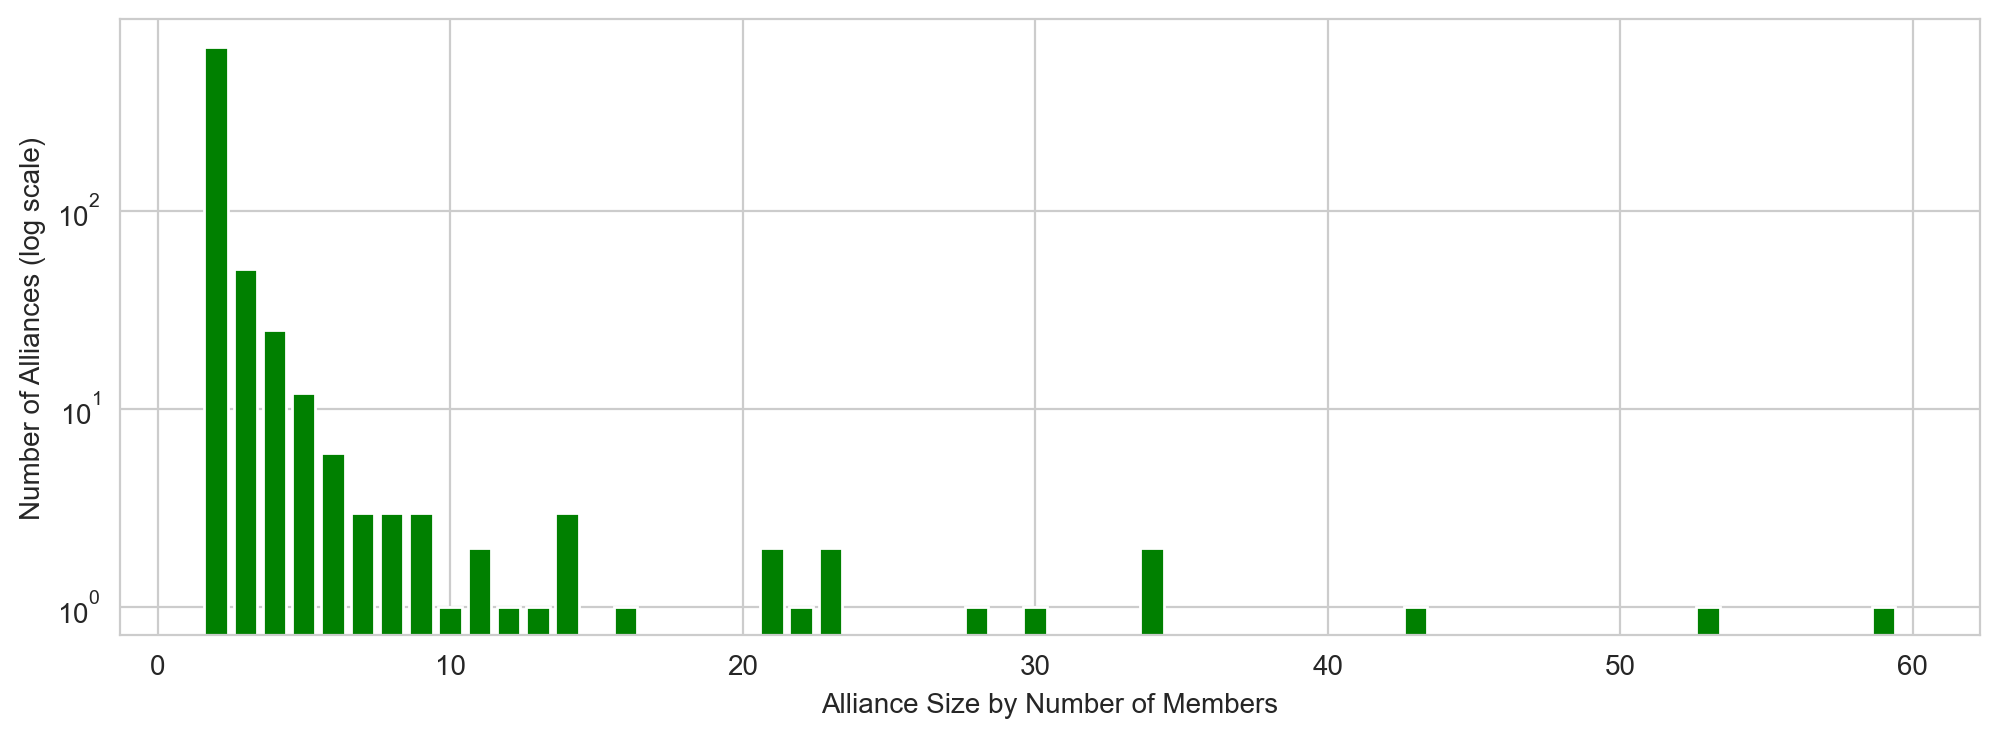

In [75]:
""" Plotting alliance size with a log scale """
plt.figure(figsize=(12, 4))
plt.bar(alliance_size.index, alliance_size.values, color='g')
plt.yscale('log')
plt.xlabel('Alliance Size by Number of Members')
plt.ylabel('Number of Alliances (log scale)')
#plt.title('Alliance Size')
plt.show()

In [50]:
""" Number of multilateral alliances """
military_alliances = atop_alliance[atop_alliance["active"] == 1]
no_multi_mil = military_alliances["members"].apply(len).value_counts().sort_index()[1:].sum()
no_multi = atop_alliance["members"].apply(len).value_counts().sort_index()[1:].sum()

print(f"There are {no_multi_mil} multilateral military alliances out of {no_multi} total alliances\nrepresenting {no_multi_mil/no_multi*100:.2f}% of all alliances")

There are 77 multilateral military alliances out of 124 total alliances
representing 62.10% of all alliances


In [51]:
""" What is the largest alliance? """
for i, j in atop_alliance.iterrows():
    if len(j["members"]) == 59:
        largest_alliance = j
        break
largest_alliance
#[cow_name(i) for i in largest_alliance["members"]]

atopid                                                  3740
cowid                                                 3617.0
cow4id                                                   NaN
begyr                                                   1975
begmo                                                      8
                                 ...                        
source                                                     1
new5                                                       0
rev5                                                       0
version                                                  5.1
members    [2.0, 20.0, 200.0, 205.0, 210.0, 211.0, 212.0,...
Name: 393, Length: 76, dtype: object